
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Filter Tropical Cyclones (TCs) that affect the site and their parameterization

inputs required: 
  * Storm tracks records (ibtracks file)
  * longitude and latitude of the site (location of the waves record)
  * radius for TCs selection (º)

in this notebook:
  * selection of TCs affecting the site (two radiouses of influence)
  * parameterization of TC tracks based on forward speed, mean pressure, and angles of entrance
  * analysis of changes in category between radiouses


### Workflow:

<div>
<img src="resources/nb01_05.png" width="300px">
</div>


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.storms import Extract_Circle, GetCategoryChangeProbs

from teslakit.plotting.storms import Plot_TCs_TracksParams, \
Plot_TCs_HistoricalTracks, Plot_TCs_HistoricalTracks_Category, Plot_Category_Change



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/nico/Projects/TESLA-kit/TeslaKit/data'
db = Database(p_data)

# set site
db.SetSite('ROI')


In [3]:
# --------------------------------------
# load data and set parameters

TCs_wmo = db.Load_TCs_noaa()  # noaa IBTrACS.ALL.v04r00.nc

# wave point longitude and latitude
pnt_lon = 167.5
pnt_lat = 9.75

# radius for TCs selection (º)
r1 = 14
r2 = 4



## Historical TCs - extraction

In [4]:
# --------------------------------------
# Select Historical TCs inside circle

# dictionary with needed variable names 
d_vns = {
    'longitude': 'lon',
    'latitude': 'lat',
    'time': 'time',
    'pressure': 'wmo_pres',
}

# Select TCs that crosses a circular area R1
TCs_r1_tracks, TCs_r1_params = Extract_Circle(TCs_wmo, pnt_lon, pnt_lat, r1, d_vns)
print(TCs_r1_tracks)

# Select TCs that crosses a circular area R2
TCs_r2_tracks, TCs_r2_params = Extract_Circle(TCs_wmo, pnt_lon, pnt_lat, r2, d_vns)
print(TCs_r2_tracks)

# store data
db.Save_TCs_r1_hist(TCs_r1_tracks, TCs_r1_params)
db.Save_TCs_r2_hist(TCs_r2_tracks, TCs_r2_params)


<xarray.Dataset>
Dimensions:           (date_time: 360, quadrant: 4, storm: 329)
Coordinates:
    time              (storm, date_time) datetime64[ns] 1951-03-18T06:00:00 ... NaT
    lat               (storm, date_time) float32 5.7 5.845132 6.0 ... nan nan
    lon               (storm, date_time) float32 158.3 158.8612 ... nan nan
  * storm             (storm) int64 5437 5444 5581 5585 ... 13204 13230 13234
Dimensions without coordinates: date_time, quadrant
Data variables:
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    name              (storm) |S128 ...
    source_usa        (storm) |S128 ...
    source_jma        (storm) |S128 ...
    source_cma        (storm) |S128 ...
    source_hko        (storm) |S128 ...
    source_new        (storm) |S128 ...
    source_reu       

<xarray.Dataset>
Dimensions:           (date_time: 360, quadrant: 4, storm: 73)
Coordinates:
    time              (storm, date_time) datetime64[ns] 1951-03-18T06:00:00 ... NaT
    lat               (storm, date_time) float32 5.7 5.845132 6.0 ... nan nan
    lon               (storm, date_time) float32 158.3 158.8612 ... nan nan
  * storm             (storm) int64 5437 5611 5621 5826 ... 12830 12852 13204
Dimensions without coordinates: date_time, quadrant
Data variables:
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    name              (storm) |S128 ...
    source_usa        (storm) |S128 ...
    source_jma        (storm) |S128 ...
    source_cma        (storm) |S128 ...
    source_hko        (storm) |S128 ...
    source_new        (storm) |S128 ...
    source_reu        

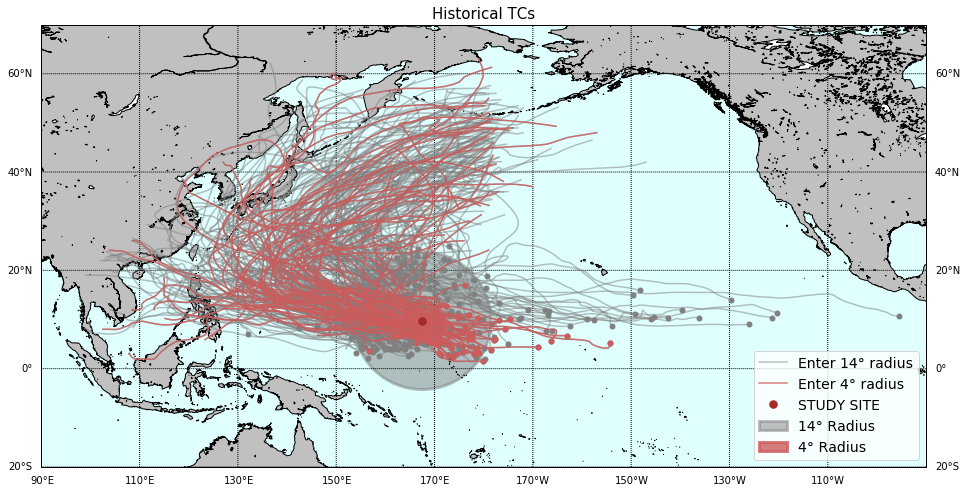

In [5]:
# Plot storm tracks world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -20, 70

Plot_TCs_HistoricalTracks(
    TCs_r1_tracks, TCs_r2_tracks,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1, r2,
);


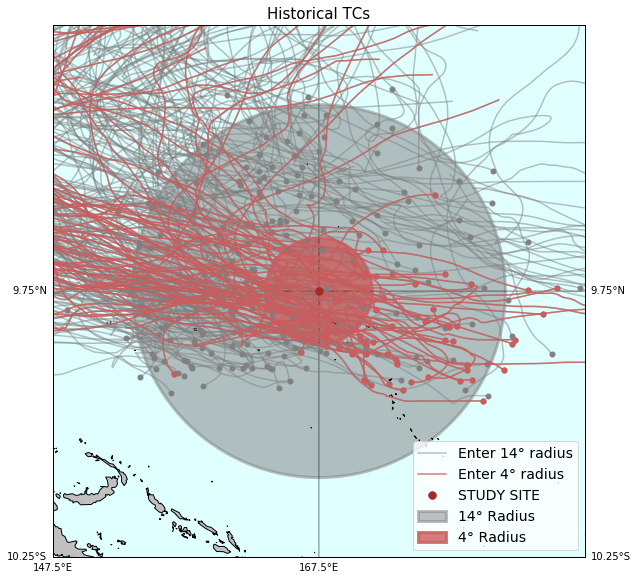

In [6]:
# zoom map

r_zoom = 20

Plot_TCs_HistoricalTracks(
    TCs_r1_tracks, TCs_r2_tracks,
    pnt_lon-r_zoom, pnt_lon+r_zoom, pnt_lat-r_zoom, pnt_lat+r_zoom,
    pnt_lon, pnt_lat, r1, r2,
);

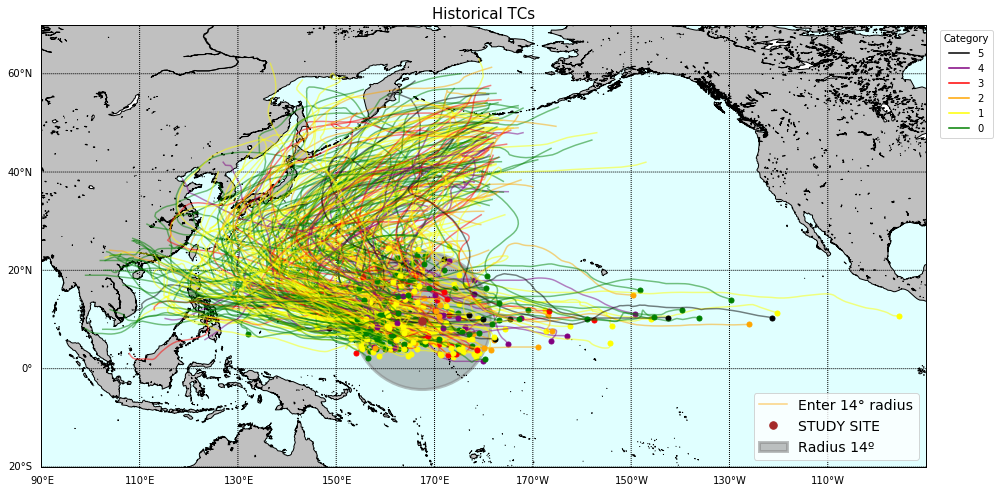

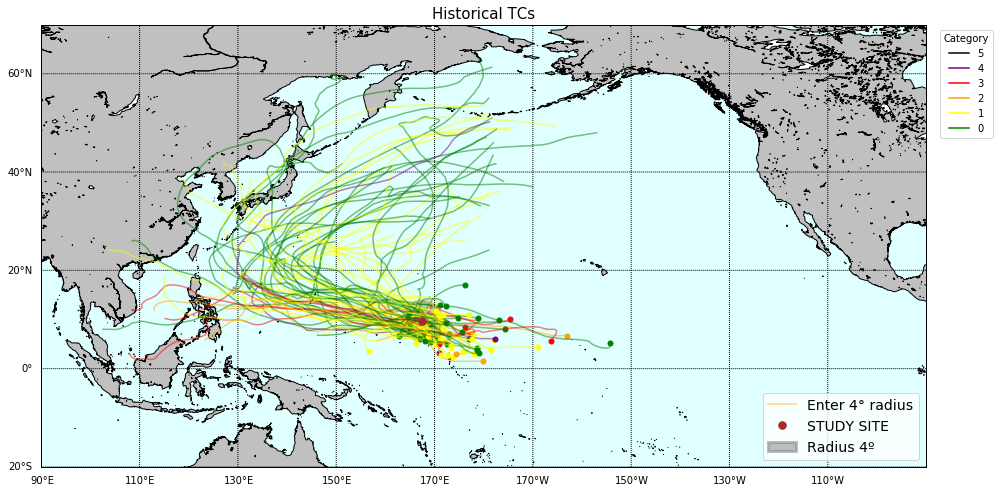

In [7]:
# Plot storm tracks category world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -20, 70

# r1
Plot_TCs_HistoricalTracks_Category(
    TCs_r1_tracks, TCs_r1_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1,
);

# r2
Plot_TCs_HistoricalTracks_Category(
    TCs_r2_tracks, TCs_r2_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r2,
);

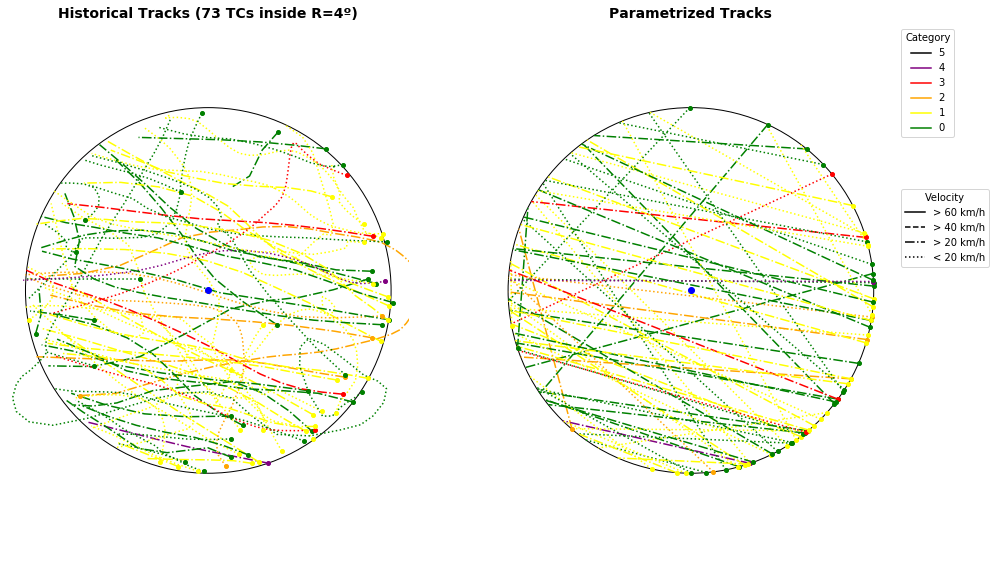

In [8]:
# Plot Historical TCs inside R2 (real tracks and parametrized tracks)

Plot_TCs_TracksParams(TCs_r2_tracks, TCs_r2_params);


In [9]:
# Calculate Historical TCs category change probabilities

categ_cp = GetCategoryChangeProbs(TCs_r1_params, TCs_r2_params)
print(categ_cp)


<xarray.Dataset>
Dimensions:                  (category: 6)
Coordinates:
  * category                 (category) int64 0 1 2 3 4 5
Data variables:
    category_change_count    (category, category) int64 7 15 6 3 1 ... 0 0 0 0 0
    category_change_probs    (category, category) float64 0.05785 0.123 ... 0.0
    category_nochange_probs  (category) float64 0.9421 0.7623 ... 0.5909 0.6667
    category_change_cumsum   (category, category) float64 0.05785 ... 0.3333


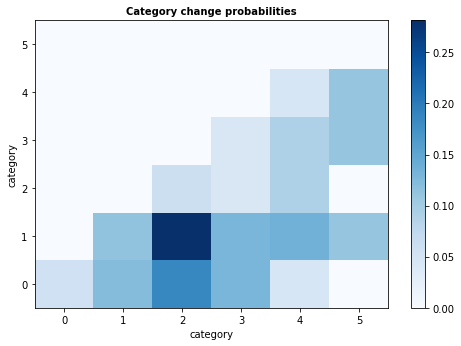

In [10]:
# Plot category change probabilities

Plot_Category_Change(categ_cp);
